Pekiştirmeli öğrenme \ takviyeli öğrenme 

Reinforced Learning

makinenin kendi kendine öğrenebilmesi üzerine dayalı bir öğrenme 
makinanın kendi kendine hatalarından ders çıkarmasıyla alakalı 
belirlenen hedefe ulaşmak için makinanaın kendisini iyileştirmesi 

( AlphaGO )

A\B test 
Tek kollu canavar ( One Armed Bandit )


Üst Güven Aralığı \ Üst Güven Sınırı
Upper Confidence Bound ( UCB )

dağılımları nasıl " en " avantajlı hale çeviririz ?

    * kullanıcı her seferinde bir eylem yapar ( event - e )
    * bu eylem karşılığında bir skor döner ( örneğin web tıklaması 1 ve tıklanmaması 0 ) 
    * amaç tıklamaları maksimuma çıkarmak 

en yüksek ( değere ) sınıra karar veriyor 


Python Rastgele Yaklaşımın kodlaması 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
veriler = pd.read_csv("Ads_CTR_Optimisation.csv")
veriler.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


4 0 1264


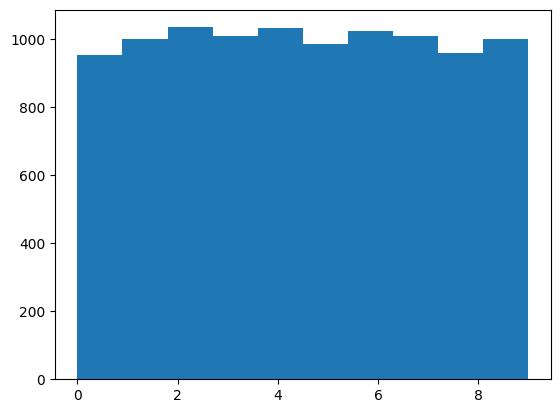

In [3]:
import random 
N = 10000
d = 10 
toplam = 0
secilenler = []
for n in range (0, N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad] # verilerde ki n. satır = 1 ise odul 1
    toplam = toplam + odul 
print(ad, odul, toplam)
plt.hist(secilenler)
plt.show()

UCB kodlaması 
bir önce ki tecrübeleri bir sonraki seçimine yansıtıyor
adım 1 : her turda (tur sayısı n olsun), her reklam alternatifi (i için) aşağıdaki sayılar tutulur 
    * Ni(n) : i sayılı reklamın o ana kadar ki tıklama sayısı 
    * Ri(n) : o ana kadar ki i reklamından gelen toplam ödül 
adım 2 : yukarıdaki bu iki sayıdan, aşağıdaki değerler hesaplanır 
    * o ana kadar ki her reklamın ortalama ödülü [Ri(n)\Ni(n)]
    * güven aralığı için aşağıda ve yukarı oynama potansiyeli di(n)math.sqrt((3log(n)\2Ni(n)))
adım 3 : en yüksek UCB değerine sahip olanı alırız 


Toplam Ödül
2231


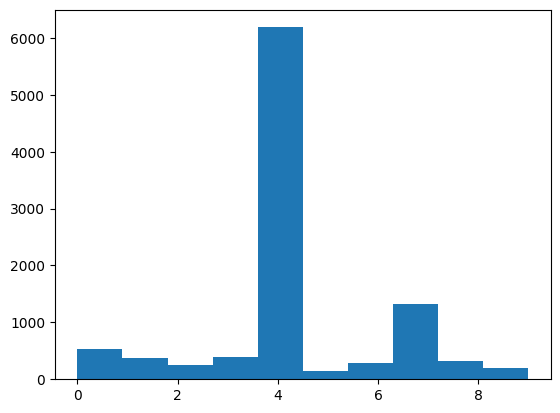

In [4]:
import math
veriler = pd.read_csv("Ads_CTR_Optimisation.csv")
N = 10000 # 10.000 tıklama
d = 10 #toplam 10 ilan var
#Ri(n)
oduller = [0] * d # ilk başta tüm ilanların ödülü 0 
#Ni(n)
toplam = 0 #toplam ödül
tiklamalar  = [0] * d # o ana kadar ki tıklamalar 
secilenler = []
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range (0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar [i]
            delta = math.sqrt(3/2 * math.log(n) / tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N * 10
        if max_ucb < ucb: # max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i
    secilenler.append(ad)  
    tiklamalar[ad]= tiklamalar[ad]+1
    odul = veriler.values[n,ad] # verilerde ki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad] + odul
    toplam = toplam + odul
print("Toplam Ödül")
print(toplam)
plt.hist(secilenler)
plt.show()